# Reading the correlation functions

This notebook explains how the correlation functions were measured from the catalogues and how to read them ([Salazar et. al. (2023)]()). Both simulation box and cosmology parameters can be found in [`cosmolgy.py`](../src/cosmology.py).

We measure $\xi(r)$ for stacked haloes at logarithmically spaced radial distances from $15\,h^{-1}$ kpc to $50\,h^{-1}$ Mpc. All data files contain the bin edges under `r_edges` and the bin *middle* point under `rbins`$-$ although we measure all correlation functions at the **same** $r$'s everytime.

---

In [1]:
from os.path import join

import h5py as h5
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from physhalo.config import SRC_PATH, MBINSTRS, NMBINS

CMAP = mpl.colormaps.get_cmap('inferno')

## 1. Mass-mass correlation function

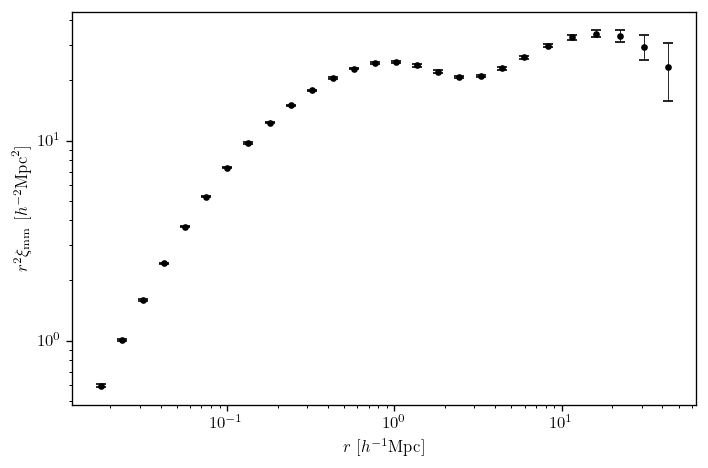

In [2]:
ds = 100

plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
plt.figure(figsize=(6, 4))

with h5.File(join(SRC_PATH, 'data/ximm.h5'), 'r') as hdf:
    r = hdf['rbins'][()]
    xi = hdf[f'xi/{ds}/'][()]
    xi_err = np.sqrt(np.diag(hdf[f'cov/{ds}/'][()]))
    plt.errorbar(r, r**2*xi, r**2*xi_err, fmt='.', lw=1.0, elinewidth=0.5,
                 capsize=3, color='k')
plt.xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$r^{2}\xi_{\rm mm}~[h^{-2}{\rm Mpc}^{2}]$')
plt.xscale('log'); plt.yscale('log')
plt.tight_layout();

## 2. Halo-mass correlation function

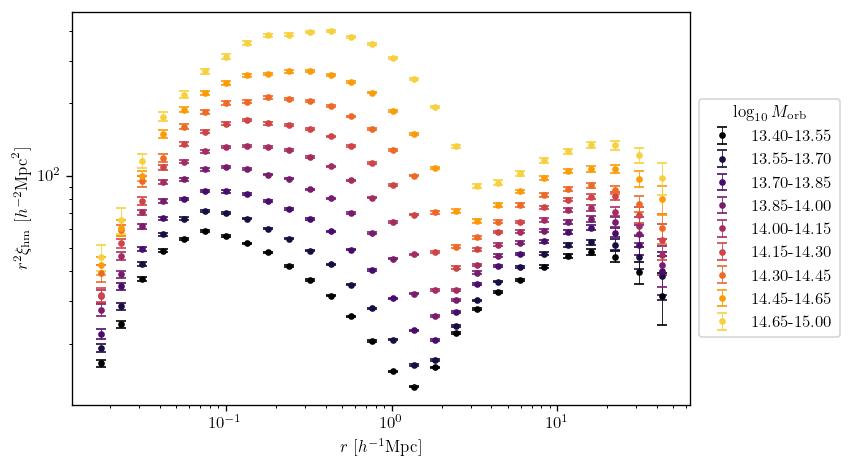

In [3]:
ds = 100

plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
plt.figure(figsize=(7.2, 4))

with h5.File(join(SRC_PATH, 'data/xihm.h5'), 'r') as hdf:
    r = hdf['rbins'][()]
    for i, mbin in enumerate(MBINSTRS):
        xi = hdf[f'xi/{ds}/{mbin}'][()]
        xi_err = np.sqrt(np.diag(hdf[f'cov/{ds}/{mbin}'][()]))
        plt.errorbar(r, r**2*xi, r**2*xi_err, fmt='.', lw=1.0, elinewidth=0.5,
                     capsize=3, label=f'{mbin}', color=CMAP(i/NMBINS),
                     )
plt.xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$r^{2}\xi_{\rm hm}~[h^{-2}{\rm Mpc}^{2}]$')
plt.xscale('log'); plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.8), title=r'$\log_{10}M_{\rm orb}$')
plt.tight_layout();

## 3. Halo-mass correlation function of orbiting/infalling particles.

We have stored the particles inside a 5 $h^{-1}$ Mpc box around each halo. This implies we can only whether a particle is orbiting the halo or still in the infall process, up to 5 $h^{-1}$ Mpc.

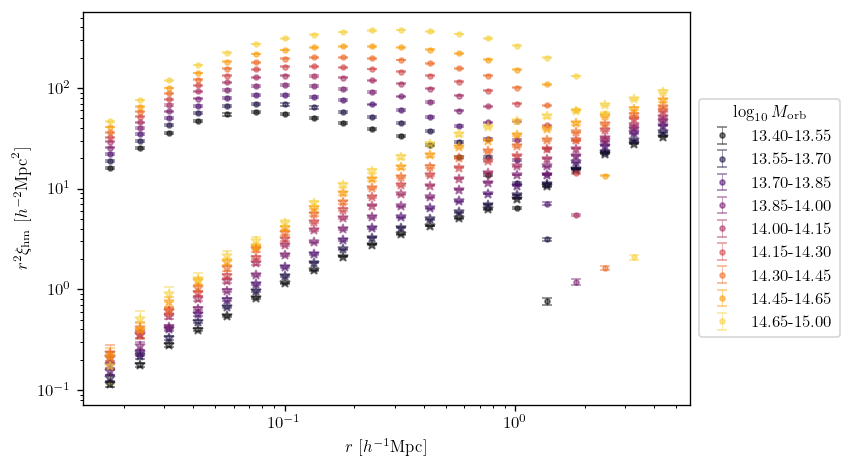

In [4]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
plt.figure(figsize=(7.2, 4))

with h5.File(join(SRC_PATH, 'data/xihm_split.h5'), 'r') as hdf:
    r = hdf['rbins'][()]
    for i, mbin in enumerate(MBINSTRS):
        xi_orb = hdf[f'xi/orb/{mbin}'][()]
        xi_inf = hdf[f'xi/inf/{mbin}'][()]
        xi_orb_err = np.sqrt(np.diag(hdf[f'xi_cov/orb/{mbin}'][()]))
        xi_inf_err = np.sqrt(np.diag(hdf[f'xi_cov/inf/{mbin}'][()]))
        plt.errorbar(r, r**2*xi_orb, r**2*xi_orb_err, fmt='.', lw=1.0,
                     elinewidth=0.5, capsize=3, label=f'{mbin}', alpha=0.5,
                     color=CMAP(i/NMBINS),
                     )
        plt.errorbar(r, r**2*xi_inf, r**2*xi_inf_err, fmt='*', lw=1.0,
                     elinewidth=0.5, capsize=3, color=CMAP(i/NMBINS), alpha=0.5,
                     )
plt.xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$r^{2}\xi_{\rm hm}~[h^{-2}{\rm Mpc}^{2}]$')
plt.xscale('log'); plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.8), title=r'$\log_{10}M_{\rm orb}$')
plt.tight_layout();

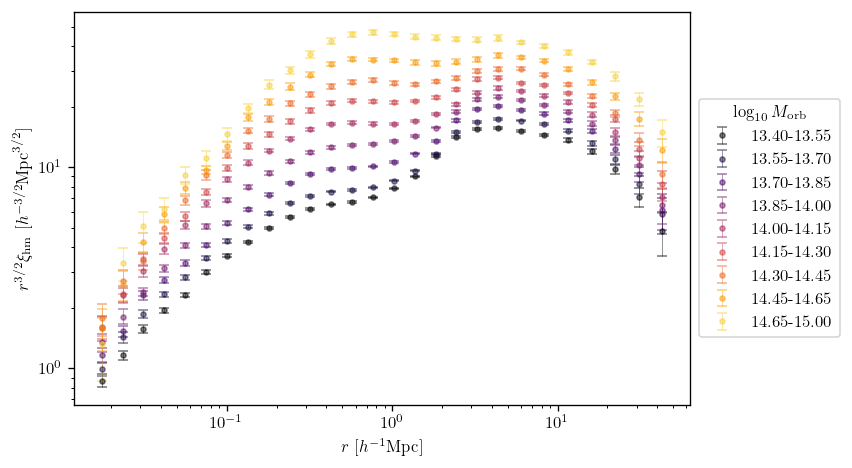

In [5]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
plt.figure(figsize=(7.2, 4))

with h5.File(join(SRC_PATH, 'data/xihm_split.h5'), 'r') as hdf:
    r = hdf['rbins_ext'][()]
    for i, mbin in enumerate(MBINSTRS):
        xi_inf = hdf[f'xi_ext/inf/{mbin}'][()]
        xi_inf_err = np.sqrt(np.diag(hdf[f'xi_ext_cov/inf/{mbin}'][()]))
        plt.errorbar(r, r**(3/2)*xi_inf, r**(3/2)*xi_inf_err, fmt='.', lw=1.0,
                     elinewidth=0.5, capsize=3, color=CMAP(i/NMBINS), alpha=0.5,
                     label=f'{mbin}',
                     )
plt.xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$r^{3/2}\xi_{\rm hm}~[h^{-3/2}{\rm Mpc}^{3/2}]$')
plt.xscale('log'); plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 0.8), title=r'$\log_{10}M_{\rm orb}$')
plt.tight_layout();

## 4. Zel'dovich approximation power spectrum and correlation function.

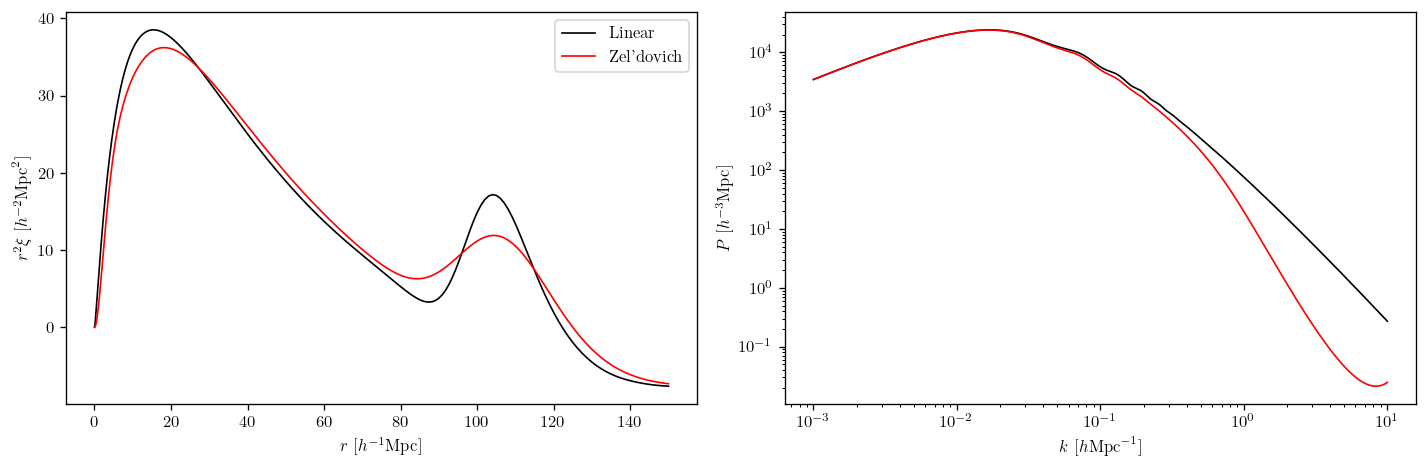

In [6]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

with h5.File(join(SRC_PATH, 'data/xi_zel.h5'), 'r') as hdf:
    k = hdf['k'][()]
    r = hdf['r'][()]
    ax1.plot(r, r**2*hdf['xi_lin'][()], lw=1.0, color='k', label="Linear")
    ax1.plot(r, r**2*hdf['xi_zel'][()], lw=1.0, color='r', label="Zel'dovich")
    ax2.plot(k, hdf['pk_lin'][()], lw=1.0, color='k', label="Linear")
    ax2.plot(k, hdf['pk_zel'][()], lw=1.0, color='r', label="Zel'dovich")

ax1.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
ax1.set_ylabel(r'$r^{2}\xi~[h^{-2}{\rm Mpc}^{2}]$')
ax1.legend()

ax2.set_xlabel(r'$k~[h{\rm Mpc}^{-1}]$')
ax2.set_ylabel(r'$P~[h^{-3}{\rm Mpc}]$')
ax2.set_xscale('log'); ax2.set_yscale('log')
plt.tight_layout();